In [ ]:
#import the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Load the dataset
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#since postal code can not help in analysis therefore drop it
df.drop(columns="Postal Code",inplace=True)

In [ ]:
df.head()


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
ndf = df.iloc[:,0:3]

#col_list = ['Ship Mode','Segment','Country','Region','Category','Sub-Category']
#ndf = df.iloc[:,col_list]

ndf['Region'] = df.Region
ndf['Category'] = df.Category
ndf['Sub-Category'] = df['Sub-Category']


#ndf = ndf.append(df.iloc[:,5:8])

ndf.head()

,Ship Mode,Segment,Country,Region,Category,Sub-Category
0,Second Class,Consumer,United States,South,Furniture,Bookcases
1,Second Class,Consumer,United States,South,Furniture,Chairs
2,Second Class,Corporate,United States,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,South,Furniture,Tables
4,Standard Class,Consumer,United States,South,Office Supplies,Storage


In [ ]:
for column in ndf:
    print("\nUnique values of ",column,"  are : ",df[column].unique())#,end="")



Unique values of  Ship Mode   are :  ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Unique values of  Segment   are :  ['Consumer' 'Corporate' 'Home Office']

Unique values of  Country   are :  ['United States']

Unique values of  Region   are :  ['South' 'West' 'Central' 'East']

Unique values of  Category   are :  ['Furniture' 'Office Supplies' 'Technology']

Unique values of  Sub-Category   are :  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
#statistics of data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<Axes: xlabel='Region'>

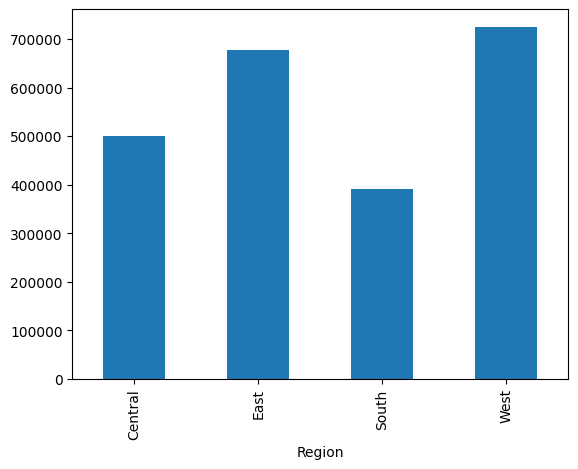

In [ ]:
#sales in different regions  or Sales Analysis on diff regions
df.groupby('Region')["Sales"].sum().plot.bar()


<Axes: xlabel='Region'>

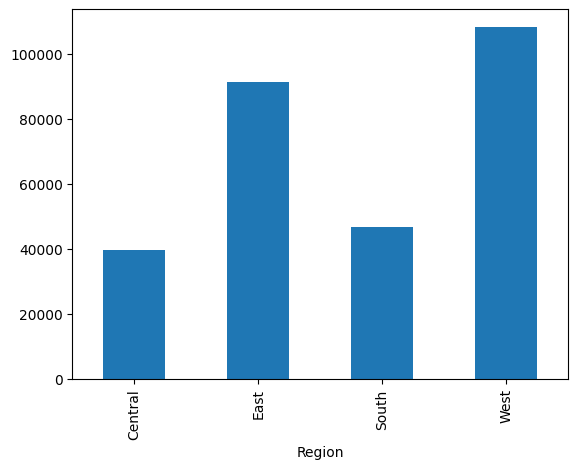

In [ ]:
#profit in different regions
df.groupby('Region')["Profit"].sum().plot.bar()


<Axes: ylabel='Sales'>

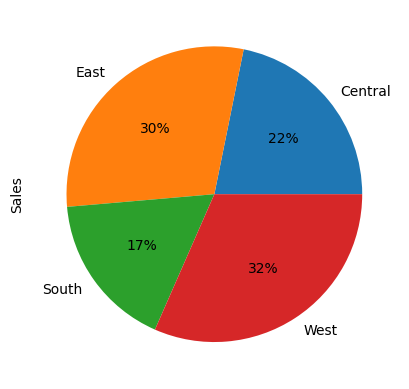

In [ ]:
df.groupby('Region')["Sales"].sum().plot.pie(autopct="%1.0f%%")


<Axes: ylabel='Profit'>

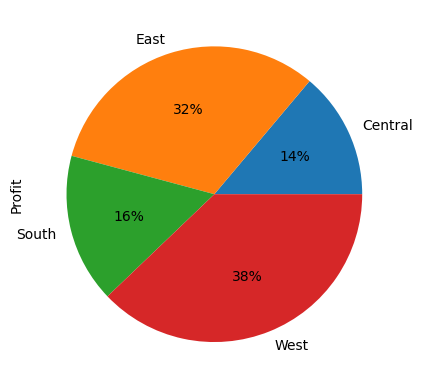

In [ ]:
df.groupby('Region')["Profit"].sum().plot.pie(autopct="%1.0f%%")


In [ ]:
#df.groupby('Segment')['Profit'].sum().plot.pie(autopct="%1.0f%%")
#df.columns

<Axes: xlabel='Segment'>

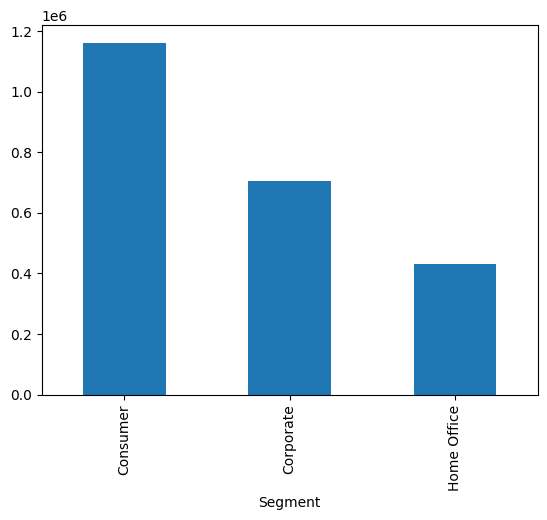

In [ ]:
df.groupby('Segment')['Sales'].sum().plot.bar()


<Axes: xlabel='Segment'>

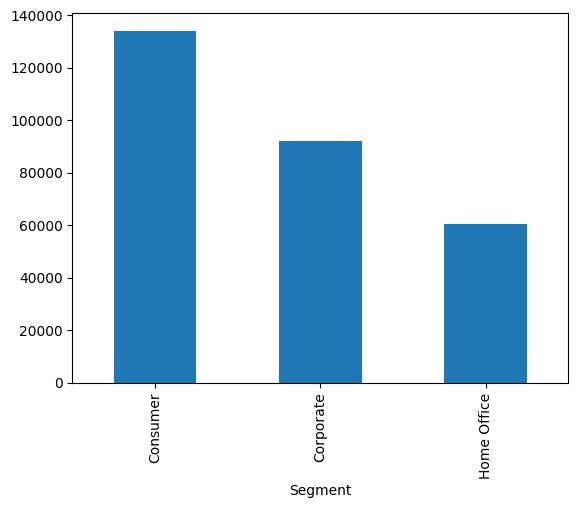

In [ ]:
df.groupby('Segment')['Profit'].sum().plot.bar()


Text(0, 0.5, 'Total Sales')

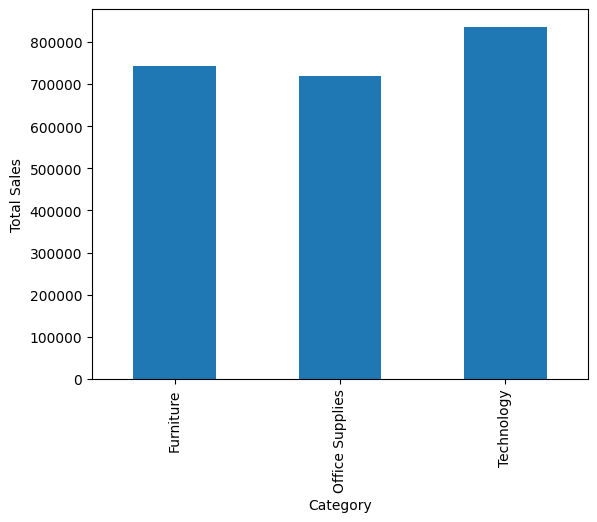

In [ ]:
df.groupby('Category')['Sales'].sum().plot.bar()
plt.xlabel('Category')
plt.ylabel('Total Sales')

<Axes: xlabel='Category'>

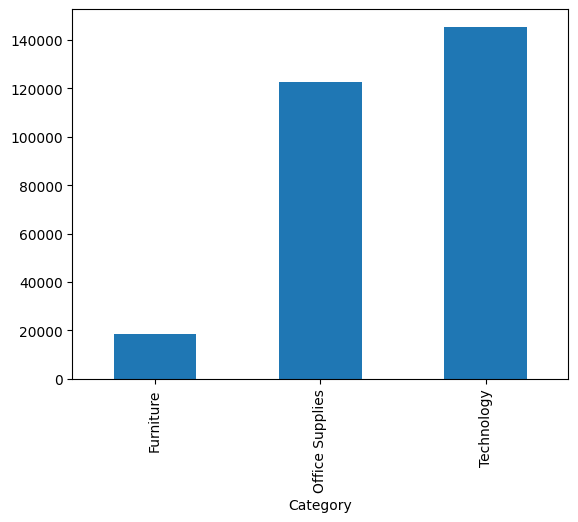

In [ ]:
df.groupby('Category')['Profit'].sum().plot.bar()


Axes(0.22375,0.11;0.5775x0.77)


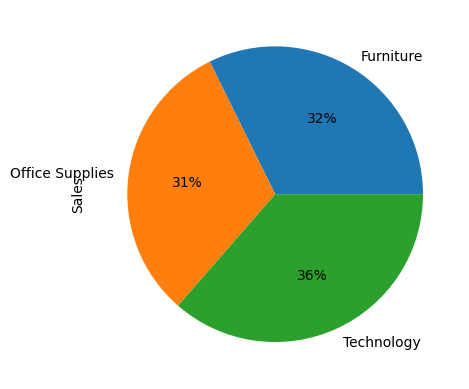

In [ ]:
print(df.groupby('Category')['Sales'].sum().plot.pie(autopct="%1.0f%%"))

<Axes: ylabel='Profit'>

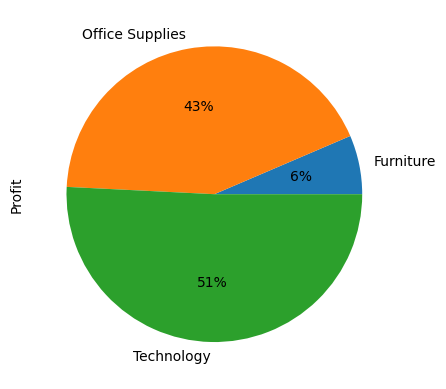

In [ ]:
df.groupby('Category')['Profit'].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='State'>

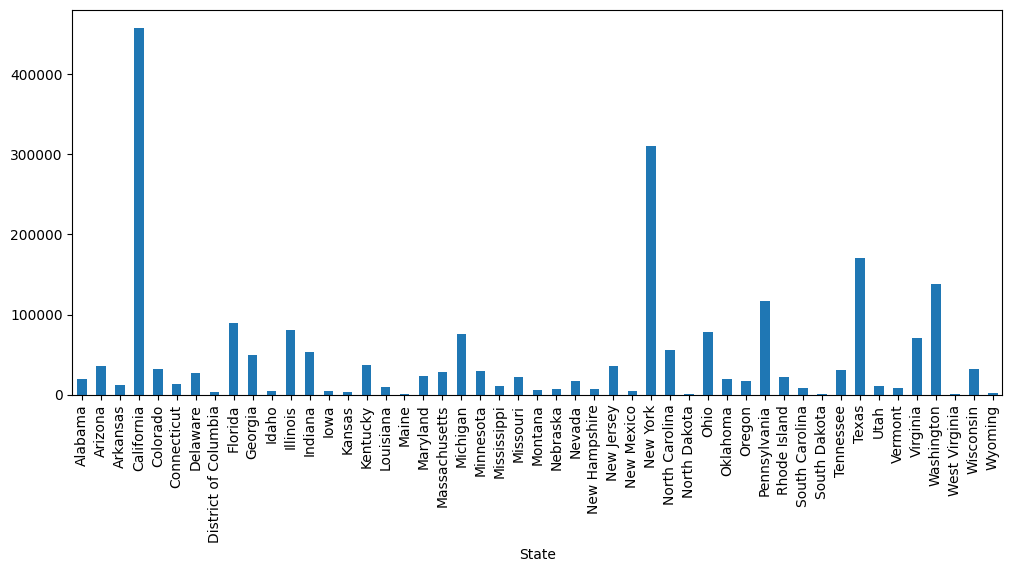

In [ ]:
plt.figure(figsize=(12,5))
df.groupby('State')['Sales'].sum().plot.bar()

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<Axes: xlabel='State'>

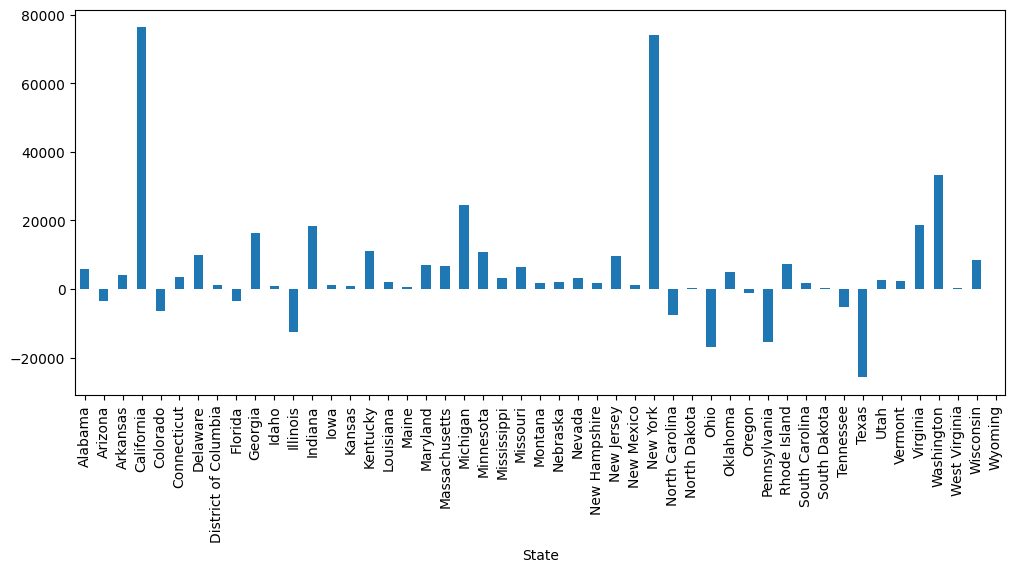

In [ ]:
plt.figure(figsize=(12,5))
df.groupby('State')['Profit'].sum().plot.bar()

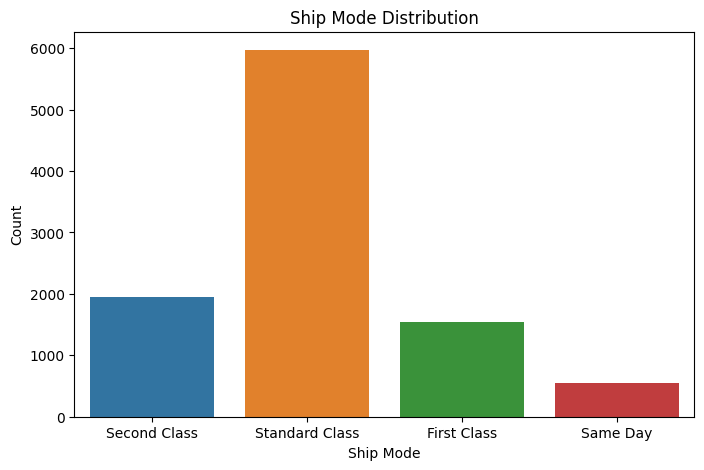

In [ ]:
# Bar chart for Ship Mode
plt.figure(figsize=(8, 5))
sns.countplot(x='Ship Mode', data=df)
plt.title('Ship Mode Distribution')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()



In [ ]:
import seaborn as sns

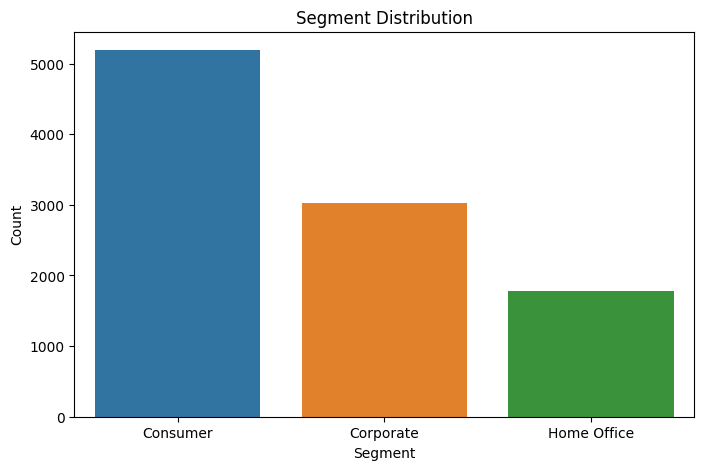

In [ ]:
# Bar chart for Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=df)
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()



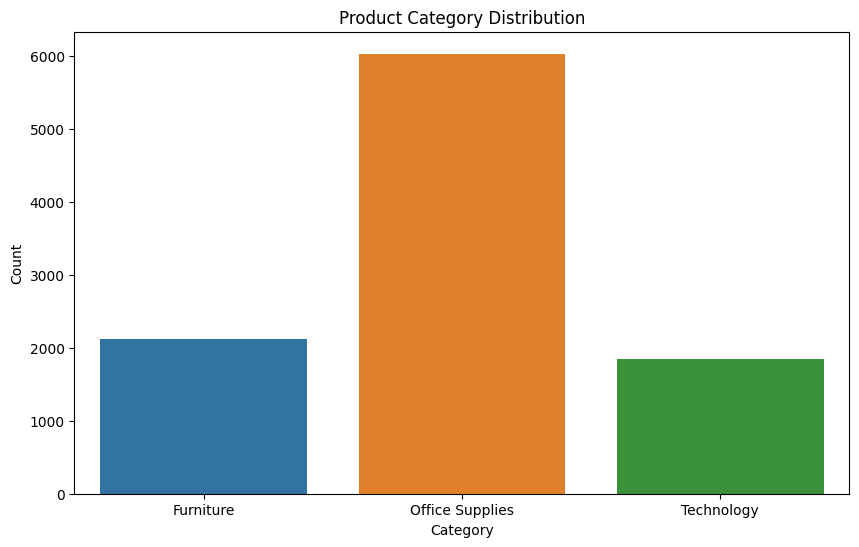

In [ ]:
# Bar chart for Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



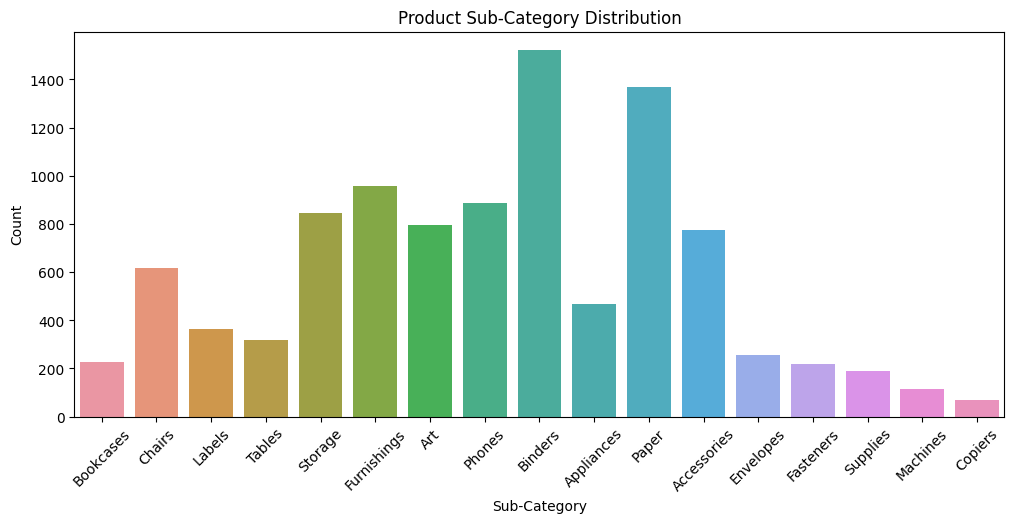

In [ ]:
# Bar chart for Sub-Category
plt.figure(figsize=(12, 5))
sns.countplot(x='Sub-Category', data=df)
plt.title('Product Sub-Category Distribution')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



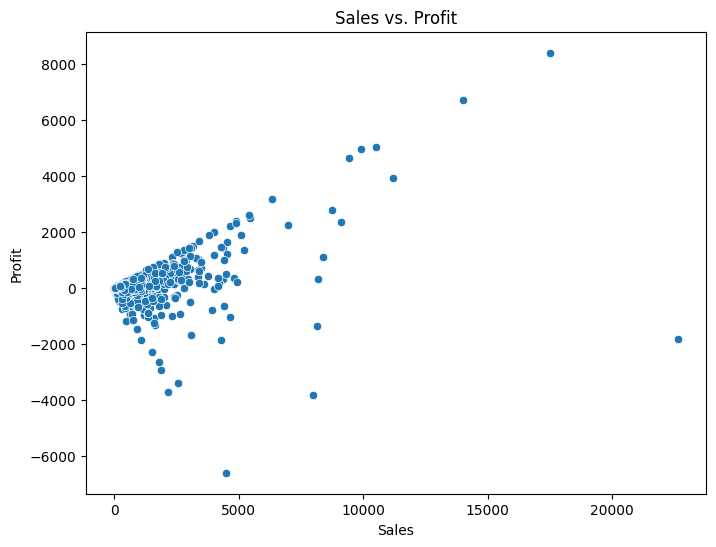

In [ ]:
# Scatter plot for Sales vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()



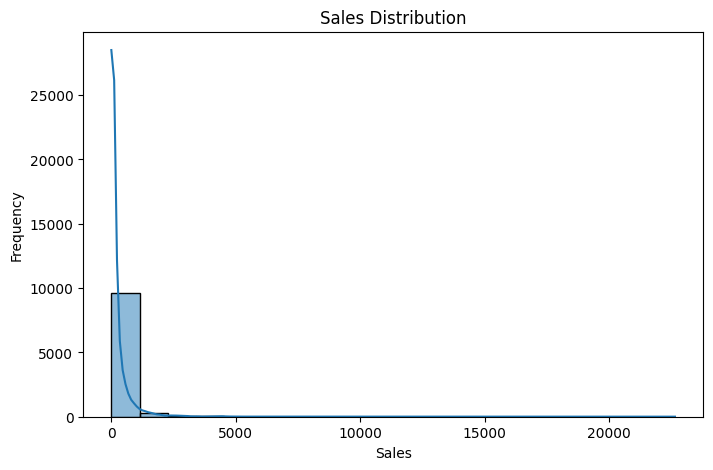

In [ ]:
# Histogram for Sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



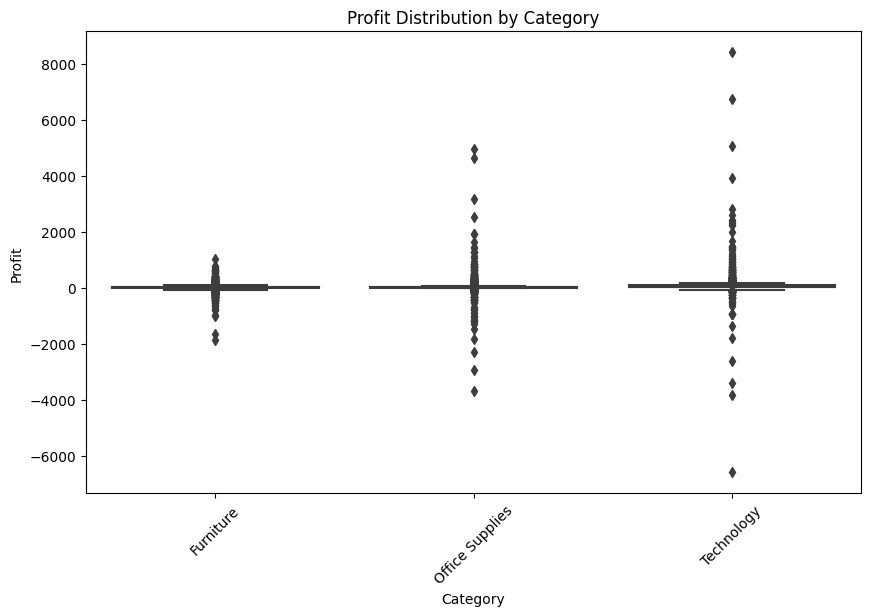

In [ ]:
# Box plot for Profit distribution by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()



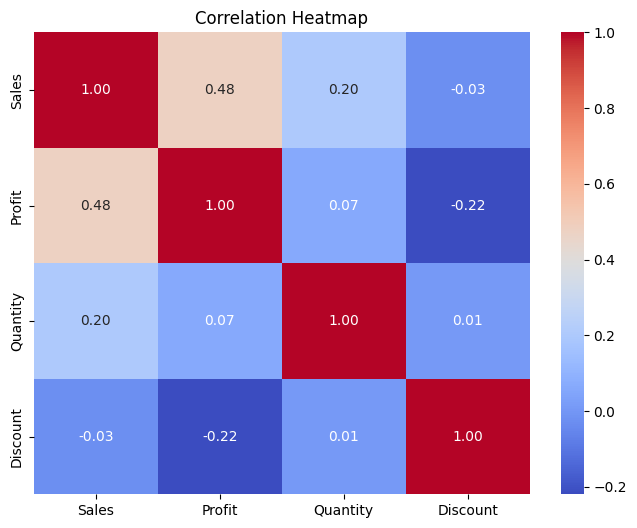

In [ ]:
# Heatmap for correlation between Sales, Profit, Quantity, and Discount
correlation_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



<Figure size 1200x600 with 0 Axes>

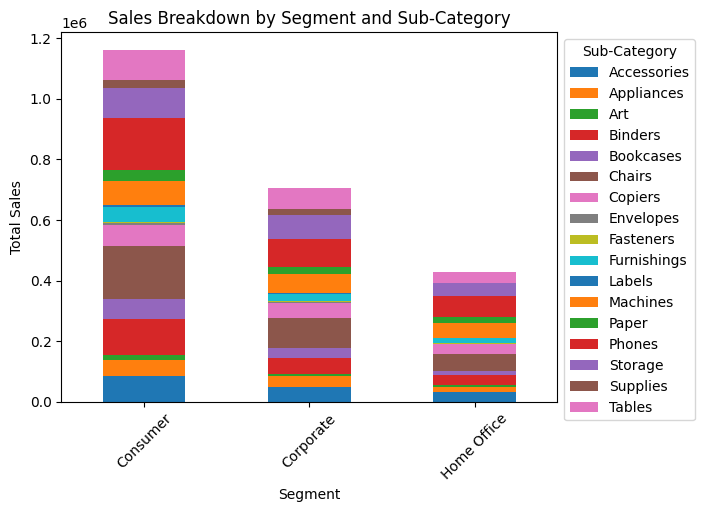

In [ ]:
# Stacked bar chart for Sales breakdown by Segment and Sub-Category
plt.figure(figsize=(12, 6))
sales_by_segment_subcat = df.groupby(['Segment', 'Sub-Category'])['Sales'].sum().reset_index()
pivot_sales = sales_by_segment_subcat.pivot(index='Segment', columns='Sub-Category', values='Sales')
pivot_sales.plot(kind='bar', stacked=True)
plt.title('Sales Breakdown by Segment and Sub-Category')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Sub-Category', bbox_to_anchor=(1, 1))
plt.show()



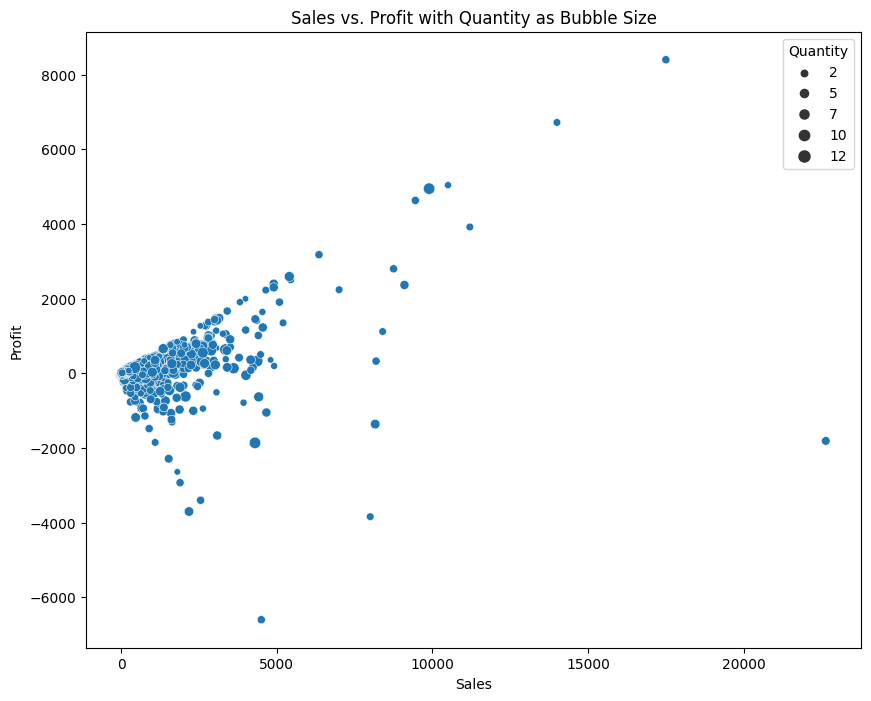

In [ ]:
# Bubble chart for Sales vs. Profit with Quantity as the bubble size
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Sales', y='Profit', size='Quantity', data=df)
plt.title('Sales vs. Profit with Quantity as Bubble Size')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()